# Determination of a prospective tariff for a telecom company

Megaline is a federal mobile operator. Clients are offered two tariff plans: "Smart" and "Ultra". The data of 500 Megaline users are at por disposal: who they are, where they are from, what tariff they use, the number of calls and messages each sent in 2018. It is necessary to analyze the behavior of customers and draw a conclusion - which tariff is better.


Tariff Description

**Smart Tariff**

Monthly fee: 550 rubles

Included 500 minutes of talk, 50 messages and 15 GB of internet traffic

The cost of services above the tariff package:

minute of conversation: 3 rubles

message: 3 rubles

1 GB of Internet traffic: 200 rubles

**Tariff "Ultra"**

Monthly fee: 1950 rubles

Included 3000 minutes of calls, 1000 messages and 30 GB of internet traffic

The cost of services above the tariff package:

minute of conversation: 1 ruble

message: 1 ruble

1 GB of Internet traffic: 150 rubles



The aim of the study is to test two hypotheses.

- The average revenue of users of the "Ultra" and "Smart" tariffs differ.
- The average revenue of users from Moscow differs from the revenue of users from other regions.

The study will take place in four stages:

- Data overview
- Data preprocessing
- Exploratory data analysis
- Statistical data analysis. Hypothesis testing.

## Examining data

In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except: 
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')    

In [3]:
for table in (calls,internet, messages, tariffs, users):
    def info(table):
        display(table.info())
        print(100*'=')
        display(table.describe())
        display(f'Shape: {table.shape}')
        print(100*'=')
        print(f'Number of null values: {table.isna().mean()}')
        print(100*'=')
        print(f'Number of duplicates: {table.duplicated().sum()}')
        print(100*'=')
        display(table.head())
    display(info(table)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


'Shape: (202607, 4)'

Number of null values: id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64
Number of duplicates: 0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


'Shape: (149396, 5)'

Number of null values: Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64
Number of duplicates: 0


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


'Shape: (123036, 3)'

Number of null values: id              0.0
message_date    0.0
user_id         0.0
dtype: float64
Number of duplicates: 0


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


'Shape: (2, 8)'

Number of null values: messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64
Number of duplicates: 0


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


'Shape: (500, 8)'

Number of null values: user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64
Number of duplicates: 0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


None

Based on the data in the table, we can conclude that before analysis, it is necessary to perform preprocessing.


The data types in the columns are int, object, float.

According to the data documentation:

**Users table (user information):**

`user_id` - unique user ID

`first_name` — username

`last_name` — user last name

`age` - user's age (years)

`reg_date` — tariff connection date (day, month, year)

`churn_date` - the date when the tariff was discontinued (if the value is omitted, then the tariff was still in effect at the time the data was uploaded)

`city` — user's city of residence

`tariff` — tariff plan name

**Table calls (information about calls):**

`id` — unique call number

`call_date` — call date

`duration` — call duration in minutes

`user_id` - identifier of the user who made the call

**Messages table (message information):**

`id` — unique message number

`message_date` — message date

`user_id` - ID of the user who sent the message

**Internet table (information about Internet sessions):**

`id` — unique session number

`mb_used` - the amount of Internet traffic spent per session (in megabytes)

`session_date` — internet session date

`user_id` — user ID

**Tariffs table (tariff information):**

`tariff_name` — tariff name

`rub_monthly_fee` — monthly subscription fee in rubles

`minutes_included` - the number of minutes of conversation per month included in the monthly fee

`messages_included` - the number of messages per month included in the subscription fee

`mb_per_month_included` - the amount of Internet traffic included in the subscription fee (in megabytes)

`rub_per_minute` - the cost of a minute of conversation in excess of the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged from 101 minutes)

`rub_per_message` - the cost of sending a message in excess of the tariff package

`rub_per_gb` - the cost of an additional gigabyte of Internet traffic in excess of the tariff package (1 gigabyte = 1024 megabytes)

- It is necessary to change the data type in the following columns `call_date`, `reg_date`, `churn_date`, `message_date`, `session_date`.
- Change data type to int where necessary
- There are missing values in the data, we need to examine and replace them if necessary.
- Convert data from mb and gb.

## Data preprocessing

### Changing data type

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [5]:
internet['mb_used'] = internet['mb_used'].astype('int32')
calls['duration'] = calls['duration'].astype('int32')

In [6]:
for table in (calls,internet, messages, tariffs, users):
    def info(table):
        display(table.info())
    display(info(table)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


None

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  int32         
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 5.1+ MB


None

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

None

In [7]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [8]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month

In [9]:
internet['gb_used'] = internet['mb_used'] / 1024 
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] /1024

The time data type was changed in the tables, and the real data type in the used mb was replaced with int.

## Calculations and adding results to the table

### Studying the number of calls made and spent minutes of conversation by month.

In [10]:
calls['month'] = calls.call_date.dt.month
messages['month'] = messages.message_date.dt.month
internet['month'] = internet.session_date.dt.month

In [11]:
calls['duration_int'] = np.ceil(calls['duration'])

In [12]:
calls_table = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total'})
calls_table.head()


,user_id,month,month_calls_duration,calls_total
0,1000,5,142,22
1,1000,6,144,43
2,1000,7,299,47
3,1000,8,367,52
4,1000,9,421,58


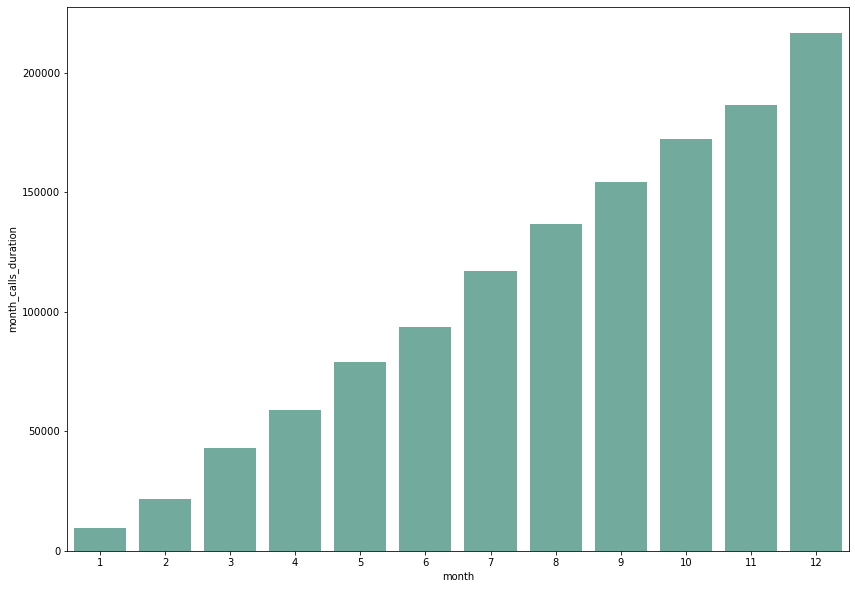

In [13]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="month_calls_duration", 
    x="month", 
    data=calls_table, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

### Studying the number of sent messages by month.

In [14]:
messages_table = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'messages_total'})
messages_table.head()

,user_id,month,messages_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


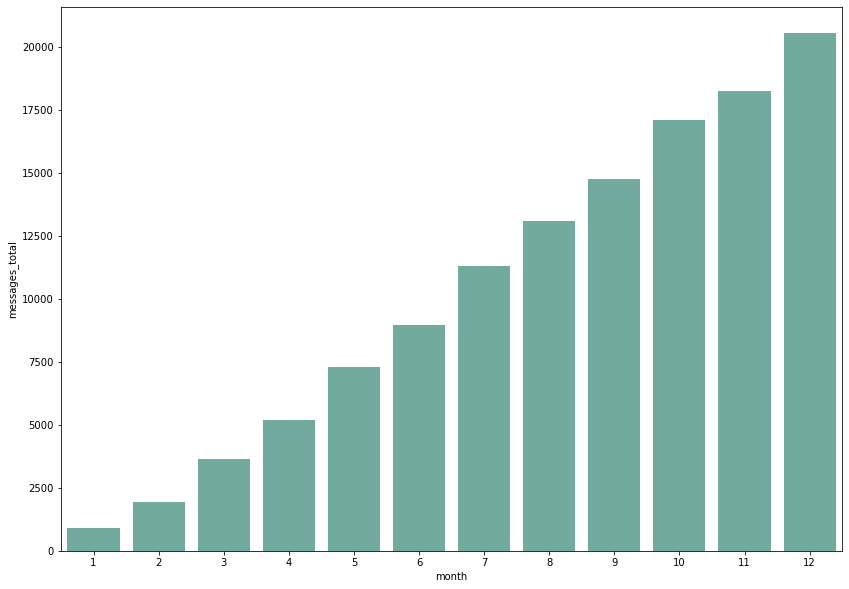

In [15]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="messages_total", 
    x="month", 
    data=messages_table, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

### Studying the amount of Internet traffic used by months;

In [16]:
internet_table = internet.groupby(['user_id', 'month'])\
                        .agg({'gb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'gb_used':'gb_total'})
internet_table.head()

,user_id,month,gb_total
0,1000,5,2.199219
1,1000,6,22.668945
2,1000,7,13.660156
3,1000,8,13.713867
4,1000,9,14.214844


In [17]:
internet_table['gb_total'] = np.ceil(internet_table['gb_total'])

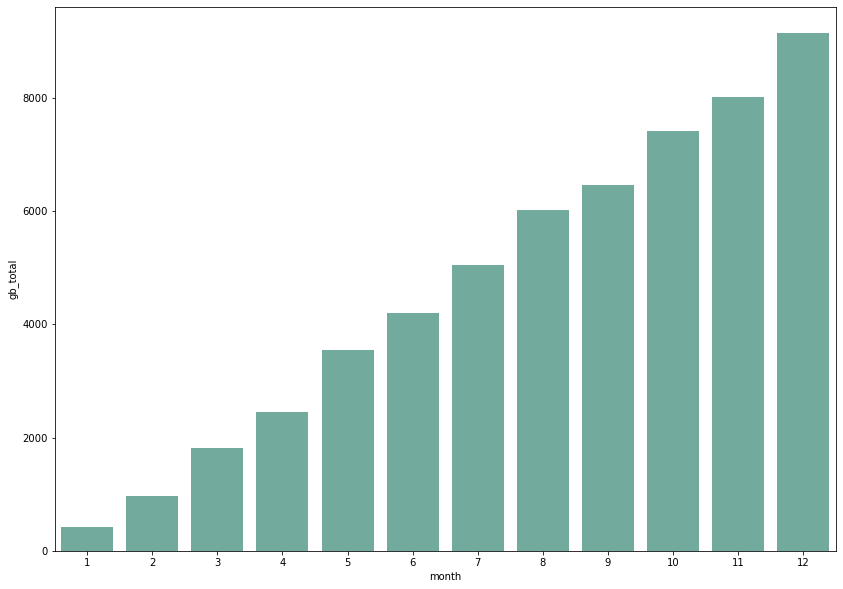

In [18]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="gb_total", 
    x="month", 
    data=internet_table, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

In [19]:
df = calls_table.merge(messages_table, on=['user_id','month'], how='outer')
df.head()

,user_id,month,month_calls_duration,calls_total,messages_total
0,1000,5,142.0,22.0,22.0
1,1000,6,144.0,43.0,60.0
2,1000,7,299.0,47.0,75.0
3,1000,8,367.0,52.0,81.0
4,1000,9,421.0,58.0,57.0


### Merging tables

In [20]:
df = df.merge(internet_table, on=['user_id','month'], how = 'outer')
df.head()

,user_id,month,month_calls_duration,calls_total,messages_total,gb_total
0,1000,5,142.0,22.0,22.0,3.0
1,1000,6,144.0,43.0,60.0,23.0
2,1000,7,299.0,47.0,75.0,14.0
3,1000,8,367.0,52.0,81.0,14.0
4,1000,9,421.0,58.0,57.0,15.0


In [21]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total,messages_total,gb_total,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,142.0,22.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,144.0,43.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,299.0,47.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,367.0,52.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,421.0,58.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [22]:
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total,messages_total,gb_total,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,142.0,22.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,6,144.0,43.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,7,299.0,47.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,8,367.0,52.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,9,421.0,58.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0


### Calculation of monthly revenue from each user

In [23]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_total                40
messages_total            497
gb_total                   11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_per_month_included       0
dtype: int64

In [24]:
df['messages_total'] = df['messages_total'].fillna(0)
df['gb_total'] = df['gb_total'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total'] = df['calls_total'].fillna(0)

In [25]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_total                 0
messages_total              0
gb_total                    0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_per_month_included       0
dtype: int64

In [26]:
df.head()

,user_id,month,month_calls_duration,calls_total,messages_total,gb_total,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,142.0,22.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,6,144.0,43.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,7,299.0,47.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,8,367.0,52.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,9,421.0,58.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0


In [27]:
df['extra_minutes']  = df['month_calls_duration'] - df['minutes_included']
df['extra_messages'] = df['messages_total'] - df['messages_included']
df['extra_gb']  = df['gb_total'] - df['gb_per_month_included']

In [28]:
df.head()

,user_id,month,month_calls_duration,calls_total,messages_total,gb_total,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,extra_minutes,extra_messages,extra_gb
0,1000,5,142.0,22.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,30.0,-2858.0,-978.0,-27.0
1,1000,6,144.0,43.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,30.0,-2856.0,-940.0,-7.0
2,1000,7,299.0,47.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,30.0,-2701.0,-925.0,-16.0
3,1000,8,367.0,52.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,30.0,-2633.0,-919.0,-16.0
4,1000,9,421.0,58.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,30.0,-2579.0,-943.0,-15.0


In [29]:
def revenue(row):
    minutes_price = 0
    messages_price = 0
    gb_used_price = 0
    monthly_fee = row ['rub_monthly_fee']
    if row['extra_minutes'] > 0:
        minutes_price = row['extra_minutes'] * row['rub_per_minute']
    if row['extra_messages'] > 0:
        messages_price = row['extra_messages'] * row['rub_per_message']
    if row['extra_gb'] > 0:
        gb_used_price = (row['extra_gb'] * row['rub_per_gb'])
                         
    return minutes_price + messages_price + gb_used_price + monthly_fee

In [30]:
df['payment_total'] = df.apply(revenue, axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   month_calls_duration   3214 non-null   float64       
 3   calls_total            3214 non-null   float64       
 4   messages_total         3214 non-null   float64       
 5   gb_total               3214 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

In [32]:
df.head()

,user_id,month,month_calls_duration,calls_total,messages_total,gb_total,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,extra_minutes,extra_messages,extra_gb,payment_total
0,1000,5,142.0,22.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,30.0,-2858.0,-978.0,-27.0,1950.0
1,1000,6,144.0,43.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,30.0,-2856.0,-940.0,-7.0,1950.0
2,1000,7,299.0,47.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,30.0,-2701.0,-925.0,-16.0,1950.0
3,1000,8,367.0,52.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,30.0,-2633.0,-919.0,-16.0,1950.0
4,1000,9,421.0,58.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,30.0,-2579.0,-943.0,-15.0,1950.0


In the course of work, we prepare data for its further analysis.

Data of calls, messages and Internet traffic has been added.

The tables have been merged so that we can analyze user behavior depending on their tariff.

We calculated the total amount that the user spends and added the data to the table.


## Exploratory data analysis

In [33]:
df.groupby('tariff')\
  .agg({'messages_total':['median','mean','var','std']})\
  .style.format("{:.2f}")

C:\Users\alina\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


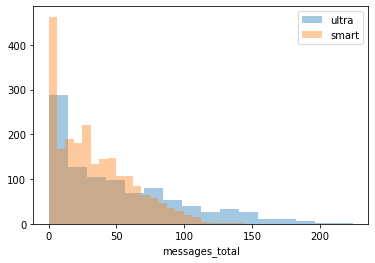

In [34]:
for tariff in ['ultra', 'smart']:
    sns.distplot(df.query('tariff == @tariff')['messages_total'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])

In [35]:
df.groupby('tariff')\
  .agg({'month_calls_duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

In [36]:
df.groupby('tariff')\
  .agg({'gb_total':['median','mean','var','std']})\
  .style.format("{:.2f}")

In [37]:
df.groupby('tariff')\
  .agg({'payment_total':['median','mean','var','std']})\
  .style.format("{:.2f}")

### Conclusion

In the course of the exploratory data analysis, we found that  high dispersion of users of the "Ultra" tariff can be observed. This means that users of this tariff have more flexibility in using the services.

Smart users have less flexibility, but tend to go over the threshold and pay reconciliations.

On average, users of the "Ultra" tariff spend 1950 rubles on mobile communications, which is equivalent to their monthly fee. When both users of the tariff are almost twice their monthly fee.



## Statistical data analysis

### Testing the first hypothesis

The following hypotheses need to be tested.

Null hypothesis: The average revenue of users of the Ultra and Smart tariffs is the same.
Alternative hypothesis: The average revenue of users of the Ultra and Smart tariffs are different.


We need to apply the scipy.stats.ttest_ind() method in order to test the hypothesis that the mean of two populations is equal based on the samples taken from them.


In [38]:
smart = df.query('tariff == "smart"')['payment_total']
ultra =  df.query('tariff == "ultra"')['payment_total']
alpha = .05

results = st.ttest_ind(smart, ultra, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject null hypothesis")

p-value: 4.94910751940952e-298
Reject the null hypothesis


### Проверка второй гипотезы

Нулевая гипотеза : Средняя выручка пользователей из Москвы соответствует средней выручки пользователей из других регионов.

Альтернативная гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нам необходимо применить метод st.ttest_1samp ().

In [39]:
moscow = df[df['city']=='Москва']['payment_total']

other_cities = df[df['city']!='Москва']['payment_total'].mean()

alpha = .05

results = st.ttest_1samp(moscow, other_cities)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject null hypothesis")

p-value: 0.3699716409242977
Failed to reject null hypothesis


Hypothesis testing showed that the average revenue of Smart and Ultra tariffs differ, and the average revenue of users from Moscow does not differ from the revenue of users from other regions. This suggests that people from different regions spend approximately the same amount of money on mobile communications.

## Summary

In the course of this study, we studied the data of Megaline users.

- The behavior of users of "Smart" and "Ultra" tariffs was studied.
- It was found that they use mobile communications in different ways, and their average revenue is different. The hypothesis that the average revenue is the same has not been confirmed. Users of the "Ultra" tariff use the possibilities of the tariff and rarely pay for services in excess of the tariff plan. Whereas, on average, Smart tariff users tend to pay for services in excess of their tariff plan.
- We refuted the hypothesis that the average revenue of users from Moscow does not differ from the revenue of users from other regions.
- For the operator, the "Smart" tariff is more profitable, since users of this tariff more often use services in excess of their tariff package. 